## Simple EDA data MILSA

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid'); #sns.set(); 



# Essa parte abaixo é apenas um exemplo da aplicação de uma função dentro de um modulo criado por mim
# Veja referência [3] e [4]
import sys
import site
site.addsitedir('../../my_modules/usefulFunctions_EDA') # adicionando o endereço do módulo # sys.path
import usefulFunctions_EDA as eda # my module


In [2]:

# import data
data = pd.read_csv('../../gettingData/data/data_MILSA')


### First Look at data

In [3]:
data.head()

,Funcionario,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
0,1,solteiro,1o Grau,NaN,4.00,26,3,interior
1,2,casado,1o Grau,1.0,4.56,32,10,capital
2,3,casado,1o Grau,2.0,5.25,36,5,capital
3,4,solteiro,2o Grau,NaN,5.73,20,10,outro
4,5,solteiro,1o Grau,NaN,6.26,40,7,outro


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Funcionario  36 non-null     int64  
 1   Est.civil    36 non-null     object 
 2   Inst         36 non-null     object 
 3   Filhos       20 non-null     float64
 4   Salario      36 non-null     float64
 5   Anos         36 non-null     int64  
 6   Meses        36 non-null     int64  
 7   Regiao       36 non-null     object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.4+ KB


In [5]:
data.describe()

,Funcionario,Filhos,Salario,Anos,Meses
count,36.000000,20.000000,36.000000,36.000000,36.000000
mean,18.500000,1.650000,11.122222,34.583333,5.611111
std,10.535654,1.268028,4.587458,6.737422,3.288749
min,1.000000,0.000000,4.000000,20.000000,0.000000
25%,9.750000,1.000000,7.552500,30.000000,3.750000
50%,18.500000,2.000000,10.165000,34.500000,6.000000
75%,27.250000,2.000000,14.060000,40.000000,8.000000
max,36.000000,5.000000,23.300000,48.000000,11.000000


<b>Pontos a observar:</b>
<ul>
    <li>O conjunto de dados é bem pequeno, apresentando <b>8 colunas</b> e <b>36 registros</b>.</li>
    <li>Em relação a dados faltantes:
        <ul>
            <li>A coluna <b>Filhos</b> é a única que apresenta dados faltantes.</li>
        </ul>
    </li>
    <li> Não foi-se apresentado um dicionário sobre os dados, desse modo, em <b>hipótese</b> as colunas <b>Anos</b> e <b>Meses</b> serão interpretadas como sendo a <b>idade</b> de cada funcionário. O motivo da hipótese colocada deve-se ao fato da coluna "Anos" apresentar como valor minimo "20.00.." o que, em princípio, parece fazer mais sentido como idade e não como tempo de serviço do funcionário.
    </li>
</ul>

### Análise univariada

De acordo com [1], uma análise univariada deve consistir em:
<ul>
    <li>"Classificar a variável quanto a seu tipo: qualitativa (nominal ou ordinal) ou quantitativa (discreta ou contínua)"</li>
    <li>"Obter tabelas, gráficos e/ou medidas que resumam a variável"</li>
</ul>

#### "Funcionario"

In [6]:
data['Funcionario'].unique().shape

(36,)

In [7]:
data['Funcionario'].dtype

dtype('int64')

<b>Em relação a coluna "Funcionario" pode-se observar:</b>
<ul>
    <li>É constituída por 36 valores únicos, mesmo número de registros, o que nos mostra ser uma <b>coluna do tipo PRIMARY KEY</b>.</li>
    <li>Coluna <b>qualitativa ordinal</b>.</li>
</ul>

#### "Est.civil"

In [8]:
data['Est.civil'].dtype #Object

dtype('O')

In [9]:
data['Est.civil'].unique().shape

(2,)

In [10]:
data['Est.civil'].value_counts()

casado      20
solteiro    16
Name: Est.civil, dtype: int64

In [11]:
estCivil_valCounts = data['Est.civil'].value_counts(normalize=True); 
estCivil_valCounts

casado      0.555556
solteiro    0.444444
Name: Est.civil, dtype: float64

<b>Em relação a coluna "Est.civil" pode-se observar: </b>
<ul>
    <li>É um variável do tipo <b>qualitativo nominal</b>.</li>
    <li>Apresenta duas categorias: "casado", "solteiro".</li>
    <li>O maior número de registros pertencem a categoria "casado".</li>
</ul>

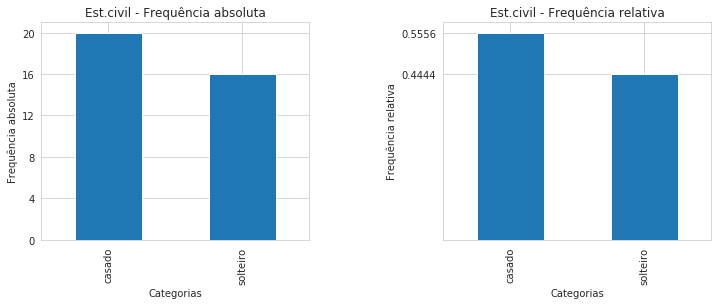

In [12]:

fig, (axe1, axe2) = plt.subplots(1,2, figsize=(12,4))
fig.subplots_adjust(wspace=0.5)

data['Est.civil'].value_counts().plot.bar(ax=axe1) # usando seaborn: sns.countplot(x='Est.civil', data=data, ax=axe1)
axe1.set_yticks(np.arange(0,21,4))
axe1.set_title('Est.civil - Frequência absoluta')
axe1.set_ylabel('Frequência absoluta')
axe1.set_xlabel('Categorias')

data['Est.civil'].value_counts(normalize=True).plot.bar(ax=axe2)
axe2.set_yticks([estCivil_valCounts[0], estCivil_valCounts[1]])
axe2.set_title('Est.civil - Frequência relativa')
axe2.set_ylabel('Frequência relativa')
axe2.set_xlabel('Categorias')

plt.show()

#### "Inst"

In [13]:
data['Inst'].dtype # tipo

dtype('O')

In [14]:
data['Inst'].isna().sum() # quantidade de valores NA

0

In [15]:
data['Inst'].unique().shape

(3,)

In [16]:
data['Inst'].value_counts()

2o Grau     18
1o Grau     12
Superior     6
Name: Inst, dtype: int64

In [17]:
inst_valCounts = data['Inst'].value_counts(normalize=True)
inst_valCounts

2o Grau     0.500000
1o Grau     0.333333
Superior    0.166667
Name: Inst, dtype: float64

<b>Em relação a coluna "Inst" pode-se observar: </b>
<ul>
    <li>É uma variável do tipo <b> qualitativa ordinal </b>.</li>
    <li>"Inst", aparentemente, está relacionado a <b>grau de instrução escolar formal</b>.</li>
    <li>Não apresenta valores NA.</li>
</ul>

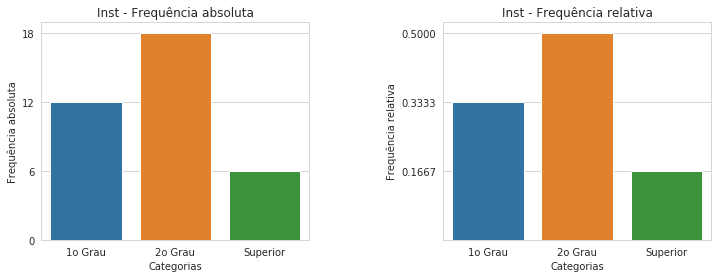

In [18]:

fig, (axe1, axe2) = plt.subplots(1,2, figsize=(12,4))
fig.subplots_adjust(wspace=0.5)

sns.countplot(x='Inst', data=data, order=['1o Grau', '2o Grau','Superior'], ax=axe1)
axe1.set_yticks(np.arange(0,19,6))
axe1.set_title('Inst - Frequência absoluta')
axe1.set_xlabel('Categorias')
axe1.set_ylabel('Frequência absoluta')

sns.barplot(x=inst_valCounts.index, y=inst_valCounts, order=['1o Grau', '2o Grau','Superior'],ax=axe2)
axe2.set_yticks(inst_valCounts)
axe2.set_title('Inst - Frequência relativa')
axe2.set_xlabel('Categorias')
axe2.set_ylabel('Frequência relativa')

plt.show()

#### "Filhos"

In [19]:
data['Filhos'].dtype

dtype('float64')

In [20]:
data['Filhos'].unique().shape

(6,)

In [21]:
data['Filhos'].isna().sum()

16

In [22]:

filhos_valueCounts = data['Filhos'].value_counts().sort_index();
print(filhos_valueCounts)

filhos_valueCounts_normalized = data['Filhos'].value_counts(normalize=True).sort_index();

# os valores são armazenadas em variáveis apenas para poderem ser utilizados mais abaixo em plotagens

0.0    4
1.0    5
2.0    7
3.0    3
5.0    1
Name: Filhos, dtype: int64


In [23]:
print('Porcentagem de valores NA: ', (data['Filhos'].isna().sum()/len(data['Filhos']))*100, ' %')

Porcentagem de valores NA:  44.44444444444444  %


<b>Em relação a coluna "Filhos" pode-se observar: </b>
<ul>
    <li>É uma variável do tipo <b>quantitativa discreta</b>.</li>
    <li>Apresenta 6 valores discretos diferentes.</li>
    <li>Em torno de 44% de seus valores são NA.</li>
</ul>

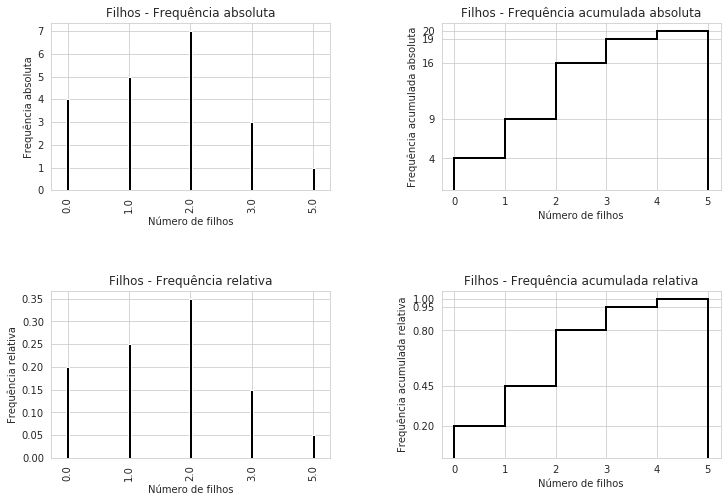

In [24]:


fig, ([[axe1, axe2], [axe3, axe4]]) = plt.subplots(2,2, figsize=(12,8))
fig.subplots_adjust(wspace=0.4, hspace=0.6)

data['Filhos'].value_counts().sort_index().plot.bar(width=0.05, color='black', ax=axe1)
axe1.set_title('Filhos - Frequência absoluta')
axe1.set_xlabel('Número de filhos')
axe1.set_ylabel('Frequência absoluta')


data['Filhos'].plot.hist(cumulative=True, bins=5, histtype='step', color='black', lw=2, ax=axe2)
axe2.set_yticks(filhos_valueCounts.cumsum())
axe2.set_xlabel('Número de filhos')
axe2.set_ylabel('Frequência acumulada absoluta')
axe2.set_title('Filhos - Frequência acumulada absoluta')


data['Filhos'].value_counts(normalize=True).sort_index().plot.bar(width=0.05, color='black', ax=axe3)
axe3.set_title('Filhos - Frequência relativa')
axe3.set_xlabel('Número de filhos')
axe3.set_ylabel('Frequência relativa')

data['Filhos'].plot.hist(cumulative=True, bins=5, histtype='step', color='black', lw=2, ax=axe4, density=True)
axe4.set_yticks(filhos_valueCounts_normalized.cumsum())
axe4.set_xlabel('Número de filhos')
axe4.set_ylabel('Frequência acumulada relativa')
axe4.set_title('Filhos - Frequência acumulada relativa')

plt.show()


#### "Salario"

In [25]:
data['Salario'].dtype

dtype('float64')

In [26]:
data['Salario'].unique().shape

(36,)

In [27]:
data['Salario'].isna().sum()

0

In [28]:

# essa cécula usa uma função de um módulo criado por mim, para teste
# a função cria as fronteiras, inteiras,das classes para um histograma e será utilizado abaixo
# para mais detalhes use: help(ufEDA.createBinsIntHistogram)
# o método utilizado para a criação dessas frontes de classe é bastante simples e é descrito
# em parte da referẽncia [1]
myBins = eda.createBinsIntHistogram(edgeMin=min(data['Salario']), edgeMax=max(data['Salario']), numReg=len(data['Salario']));
print('Fronteiras do histograma abaixo: ',myBins)

Fronteiras do histograma abaixo:  [ 4.  8. 12. 16. 20. 24.]


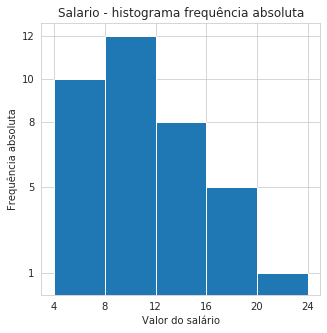

In [29]:

fig = plt.figure(figsize=(5,5))
axe = plt.gca()
(n, bins, p) = plt.hist(x=data['Salario'], bins=myBins)
axe.set_xticks(bins)
axe.set_yticks(n)
axe.set_title('Salario - histograma frequência absoluta')
axe.set_xlabel('Valor do salário')
axe.set_ylabel('Frequência absoluta')
plt.show()


<b>Em relação a coluna "Salario" pode-se observar:</b>
<ul>
    <li>É uma variável <b>quantitativa contínua</b>.</li>
    <li>Apresenta 36 valores únicos, ou seja, nenhum funcionário tem o salário igual a outro.</li>
    <li>Não apresenta valores NA.</li>
</ul>



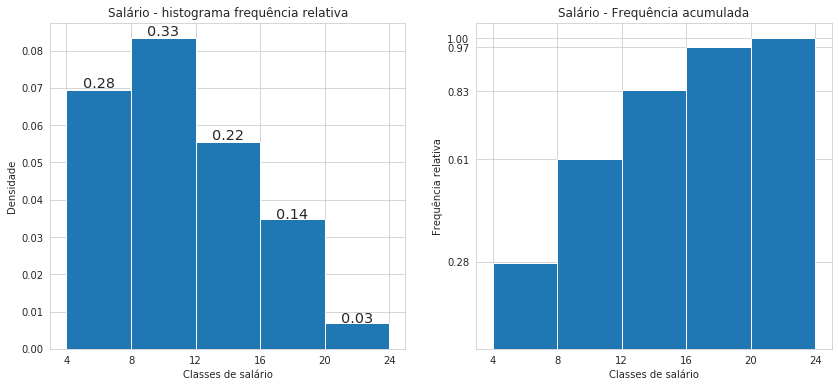

In [30]:

fig, (axe1,axe2) = plt.subplots(1,2, figsize=(14,6))

n1, bins1, p1 = axe1.hist(x=data['Salario'], bins=myBins, density=True)
axe1.set_title('Salário - histograma frequência relativa')
axe1.set_xlabel('Classes de salário')
axe1.set_ylabel('Densidade')
axe1.set_xticks(bins1); #axe1.set_yticks(n1); 
k = np.around((n/36),2); #axe1.legend((p1),k,framealpha=0, )


# adiciona a legenda de frequencia relativa em cima de cada bin
#for i in range(0,len(n1)):
#    axe1.text((bins1[i+1]-bins1[i])/4 + bins1[i], n1[i] + (n1[i]*0.01),str(k[i]), fontsize='x-large')

# adiciona a legenda de frequencia relativa em cima de cada bin
# mesma função da parte comentada logo acima, só que implementada de uma forma melhor em um módulo separado
eda.label_densityHist(axe1, n1, bins1, fontsize='x-large')

    
n2, bins2, p2 = axe2.hist(x=data['Salario'], bins=myBins, density=True, cumulative=True)
axe2.set_title('Salário - Frequência acumulada')
axe2.set_xlabel('Classes de salário')
axe2.set_ylabel('Frequência relativa')
axe2.set_xticks(myBins)
k2 = np.around(n2,2)
axe2.set_yticks(k2)

plt.show()



#### "Anos"

In [36]:
data['Anos'].dtype

dtype('int64')

In [37]:
data['Anos'].isna().sum()

0

In [38]:
data['Anos'].unique().shape

(24,)

In [39]:
data['Anos'].describe()

count    36.000000
mean     34.583333
std       6.737422
min      20.000000
25%      30.000000
50%      34.500000
75%      40.000000
max      48.000000
Name: Anos, dtype: float64

<b>Em relação a coluna "Anos" pode-se observar:</b>
<ul>
    <li>É uma variável <b>quantitativa discreta</b>.</li>
    <li>Não apresenta valores NA.</li>
    <li>Apresenta 24 valores diferentes. Os valores que se repetem, se repetem no máximo 2 vezes.</li>
    Sem um dicionário a interpretação para essa coluna é bastante complicada, das opções de interpretação estão: Idade em anos do funcionário, tempo em anos de serviço do mesmo. Como colocado acima em <b>First look at data</b> a primeira opção parece, em principio, fazer mais sentido.
</ul>

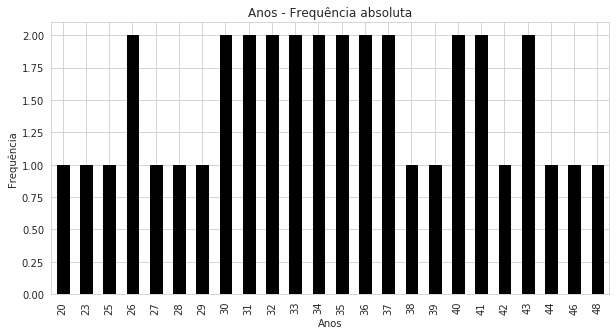

In [55]:

fig = plt.figure(figsize=(10,5))
data['Anos'].value_counts().sort_index().plot.bar(width=0.5, color='black', edgecolor='black')
plt.title('Anos - Frequência absoluta')
plt.xlabel('Anos')
plt.ylabel('Frequência')
plt.show()

#### "Meses"

In [56]:
data['Meses'].dtype

dtype('int64')

In [57]:
data['Meses'].isna().sum()

0

In [58]:
data['Meses'].unique().shape

(12,)

In [59]:
data['Meses'].describe()

count    36.000000
mean      5.611111
std       3.288749
min       0.000000
25%       3.750000
50%       6.000000
75%       8.000000
max      11.000000
Name: Meses, dtype: float64

<b>Em relação a coluna "Meses" pode-se observar: </b>
<ul>
    <li>É uma variável do tipo <b>quantidade discreta</b>.</li>
    <li>Não apresenta valores NA.</li>
    <li>Apresenta 12 valores unicos, cada mês do ano, referenciados de 0 a 11.</li>
</ul>

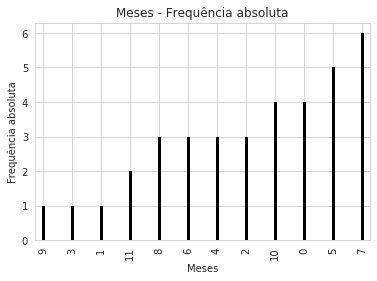

In [64]:

data['Meses'].value_counts().sort_values().plot.bar(width=0.05, edgecolor='black', color='black')
plt.xlabel('Meses')
plt.ylabel('Frequência absoluta')
plt.title('Meses - Frequência absoluta')
plt.show()

#### "Regiao"

In [65]:
data['Regiao'].dtype

dtype('O')

In [66]:
data['Regiao'].isna().sum()

0

In [67]:
data['Regiao'].unique().shape

(3,)

In [69]:
data['Regiao'].value_counts()

outro       13
interior    12
capital     11
Name: Regiao, dtype: int64

In [ ]:
### continuar daqui

### Análise multivariada

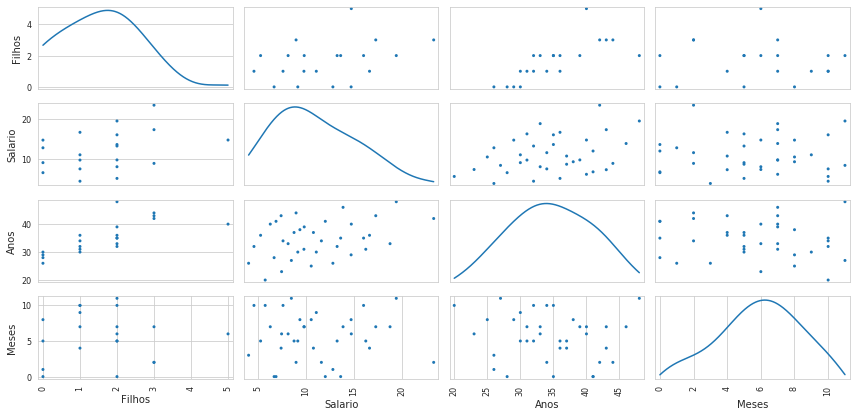

In [85]:
pd.plotting.scatter_matrix(data.loc[:,'Est.civil':'Regiao'], figsize=(12,6), diagonal='kde', alpha=1)
plt.tight_layout()
plt.show()

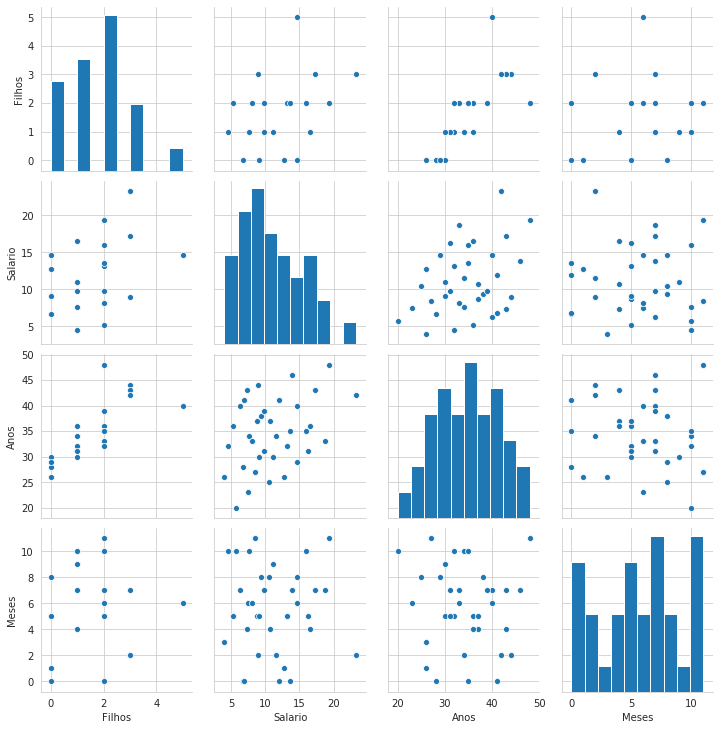

In [93]:


sns.pairplot(data.loc[:,'Est.civil':'Regiao'])


## References

[1]http://leg.ufpr.br/~fernandomayer/aulas/ce001e-2016-2/02_Analise_Exploratoria_de_Dados.html
<br>
[2]https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
<br>
[3]https://www.programiz.com/python-programming/modules
<br>
[4]https://www.devdungeon.com/content/python-import-syspath-and-pythonpath-tutorial
<br>